In [2]:
# Advanced Big Data 
# Homework 2
# Xueyan Bai 
# Selected Stock: S&P 500
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel
from scipy.optimize import minimize

In [3]:
# Import Historical Daily Adj Closed Price for 5-year 
GSPC = pd.read_csv('/users/zolab/desktop/pythonwork/^GSPC.csv')

In [4]:
keep_col = ['Adj Close','Volume']
sp500 = GSPC[keep_col]
sp500.columns = ['adj','vol']
sp500.index = GSPC['Date']
sp500

,adj,vol
Date,,
2016-02-09,1852.209961,5183220000
2016-02-10,1851.859985,4471170000
2016-02-11,1829.079956,5500800000
2016-02-12,1864.780029,4696920000
2016-02-16,1895.579956,4570670000
...,...,...
2021-02-02,3826.310059,5495370000
2021-02-03,3830.169922,4846900000
2021-02-04,3871.739990,4856670000


In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

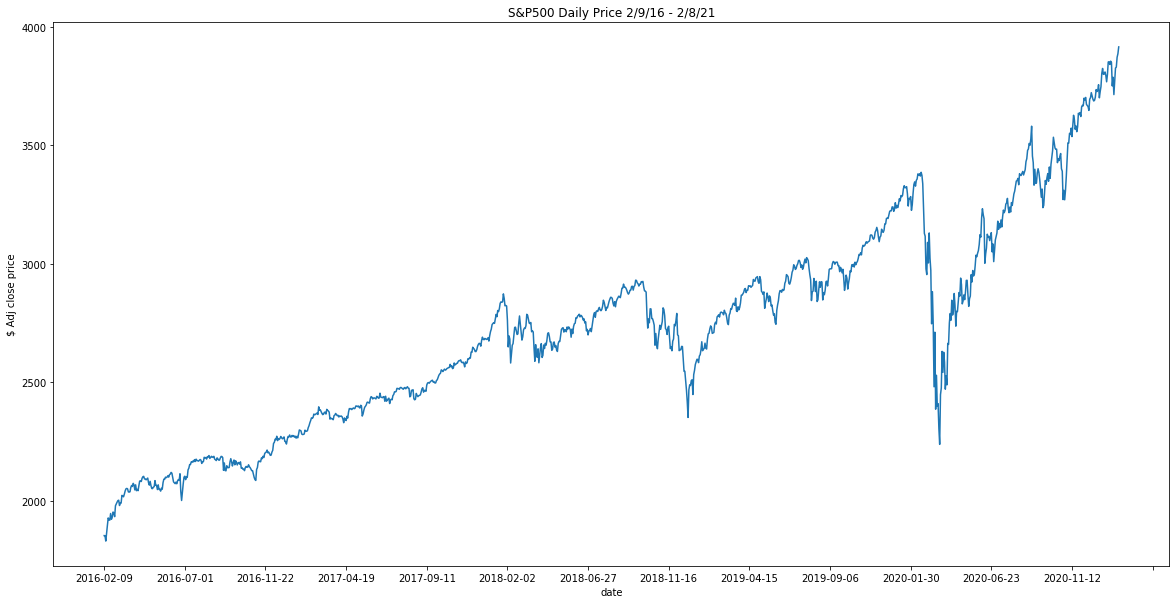

In [6]:
fig = plt.figure(figsize=(20,10))  
plt.plot(sp500['adj'])
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(100)) 
plt.xlabel("date")
plt.ylabel("$ Adj close price")
plt.title("S&P500 Daily Price 2/9/16 - 2/8/21")
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

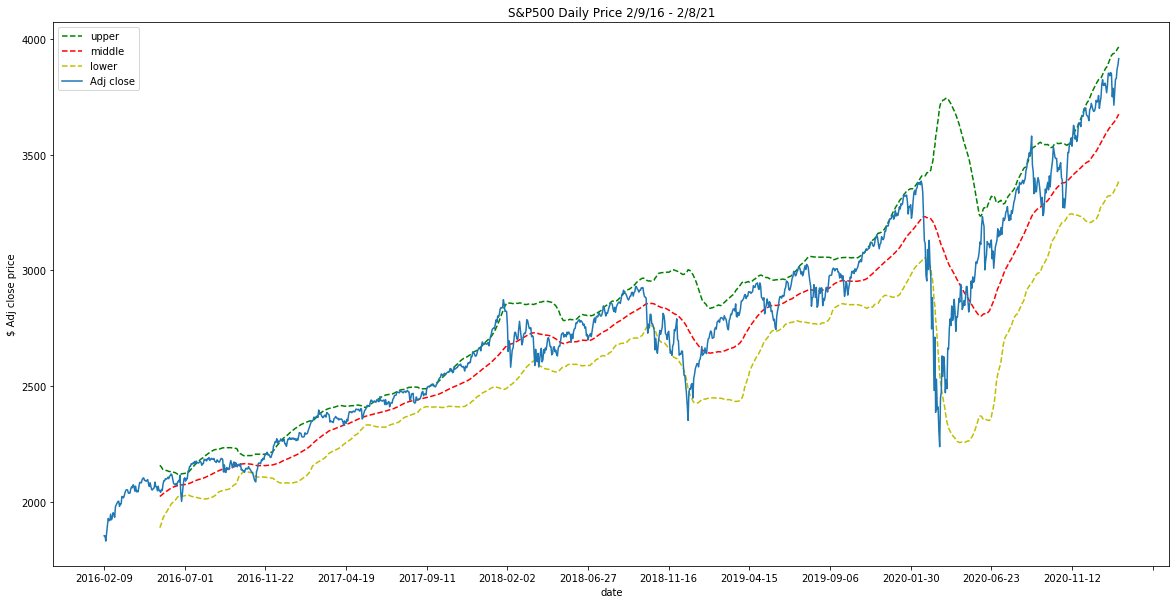

In [7]:
# Based on the Reading Material
sp500['middle_band']= sp500['adj'].rolling(window=70).mean()
sp500['upper_band'] = sp500['adj'].rolling(window=70).mean() + sp500['adj'].rolling(window=70).std()*2
sp500['lower_band'] = sp500['adj'].rolling(window=70).mean() - sp500['adj'].rolling(window=70).std()*2
plt.figure(figsize=(20,10))
plt.plot(sp500['upper_band'],'g--', label="upper")
plt.plot(sp500['middle_band'],'r--', label="middle")
plt.plot(sp500['lower_band'],'y--', label="lower")
plt.plot(sp500['adj'], label="Adj close")
plt.legend()
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(100)) 
plt.xlabel("date")
plt.ylabel("$ Adj close price")
plt.title("S&P500 Daily Price 2/9/16 - 2/8/21")
plt.show()

In [46]:
# Consider Time Series GARCH Model, because the return of stock price is usually distributed normally. 
kep = ['adj','vol']
returns = sp500[kep]
returns['pct_return'] = sp500.adj.pct_change()
returns['log_return'] = np.log(sp500.adj)-np.log(sp500.adj.shift(1))
returns

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,adj,vol,pct_return,log_return
Date,,,,
2016-02-09,1852.209961,5183220000,NaN,NaN
2016-02-10,1851.859985,4471170000,-0.000189,-0.000189
2016-02-11,1829.079956,5500800000,-0.012301,-0.012377
2016-02-12,1864.780029,4696920000,0.019518,0.019330
2016-02-16,1895.579956,4570670000,0.016517,0.016382
...,...,...,...,...
2021-02-02,3826.310059,5495370000,0.013898,0.013803
2021-02-03,3830.169922,4846900000,0.001009,0.001008
2021-02-04,3871.739990,4856670000,0.010853,0.010795


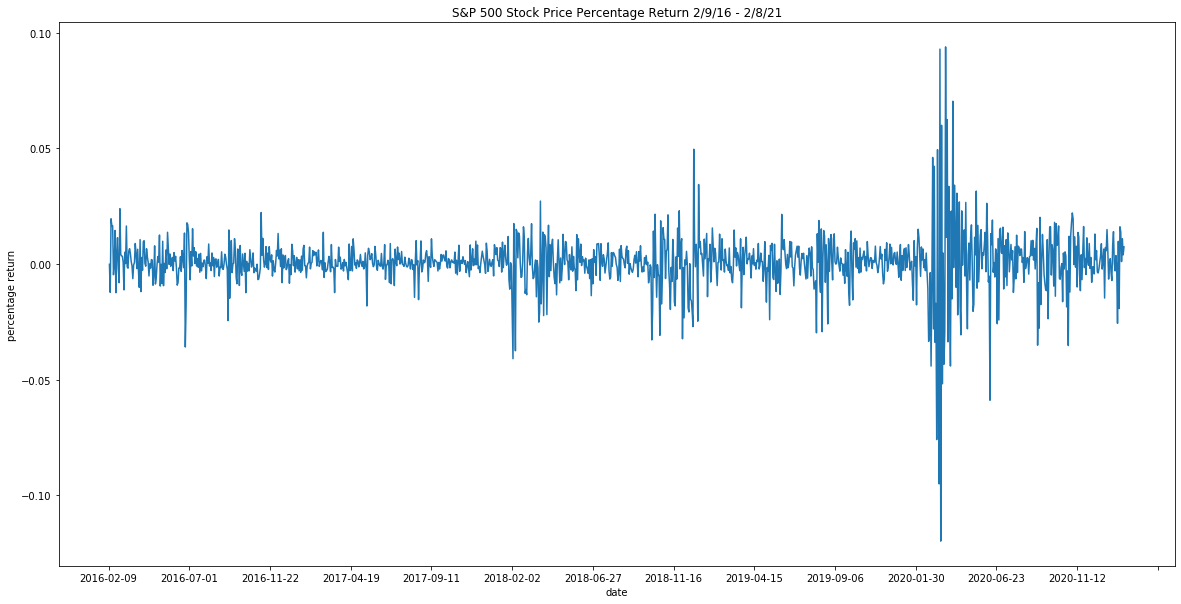

In [47]:
# Graph of Return 
plt.figure(figsize=(20,10))
plt.plot(returns.index,returns["pct_return"])
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(100)) 
plt.xlabel("date")
plt.ylabel("percentage return")
plt.title("S&P 500 Stock Price Percentage Return 2/9/16 - 2/8/21")
plt.show()

In [49]:
from arch import arch_model
re = 100*returns['pct_return'].dropna()
am = arch_model(re)
from arch.univariate import ConstantMean,GARCH, Normal
am = ConstantMean(re)
am.volatility = GARCH(1, 0, 1)
am.distribution = Normal()
res = am.fit()
print(res.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1501.7924877636779
Iteration:      2,   Func. Count:     17,   Neg. LLF: 1500.5047985876813
Iteration:      3,   Func. Count:     25,   Neg. LLF: 1500.3185829040326
Iteration:      4,   Func. Count:     32,   Neg. LLF: 1499.4796587774717
Iteration:      5,   Func. Count:     39,   Neg. LLF: 1498.894517234536
Iteration:      6,   Func. Count:     46,   Neg. LLF: 1498.797200426151
Iteration:      7,   Func. Count:     53,   Neg. LLF: 1498.6935761194118
Iteration:      8,   Func. Count:     59,   Neg. LLF: 1498.56389004009
Iteration:      9,   Func. Count:     65,   Neg. LLF: 1498.5506612404115
Iteration:     10,   Func. Count:     71,   Neg. LLF: 1498.5506474991048
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1498.5506474990375
            Iterations: 10
            Function evaluations: 71
            Gradient evaluations: 10
                     Constant Mean - GARCH Model Results       

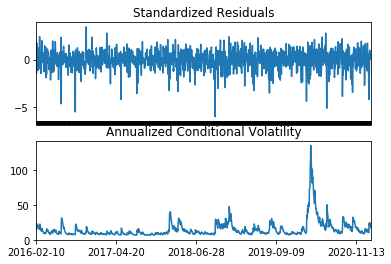

In [63]:
fig = res.plot(annualize = 'D')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(300))